# baseline solution

In [2]:
import glob
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

%matplotlib inline
import numpy as np

import os
import cv2

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

Mounted at /gdrive


In [3]:
from tqdm import tqdm  # download images

dirname = "/gdrive/My Drive/ML_mini_course/StartML_AMI/train"

X, y = [], []

for fname in tqdm(os.listdir(dirname)):
    img = cv2.imread(os.path.join(dirname, fname), cv2.IMREAD_GRAYSCALE)
    label = int(fname.split('label')[1].split('.jpg')[0])
    h, w = img.shape
    size = min(h, w)
    h0 = int((h - size) / 2)
    w0 = int((w - size) / 2)
        
    img = img[h0: h0 + size, w0: w0 + size]
    img = cv2.resize(img, (64, 64), interpolation = cv2.INTER_AREA)
        
    X.append(img)
    y.append(label)

100%|██████████| 621/621 [00:09<00:00, 63.31it/s] 


In [4]:
data = np.asarray([el.ravel() for el in X])

In [5]:
Xtrain, Xtest, ytrain, ytest = train_test_split(data, y, stratify = y, random_state=42)

In [6]:
model_lr = LogisticRegression()
model_lr.fit(Xtrain, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [7]:
pred_lr = model_lr.predict(Xtest)
accuracy_score(ytest, pred_lr)

0.5192307692307693

kaggle result(data on kaggle is with visual noise, and the basic model seems to be retraining - thats why the result in the competition is so low)
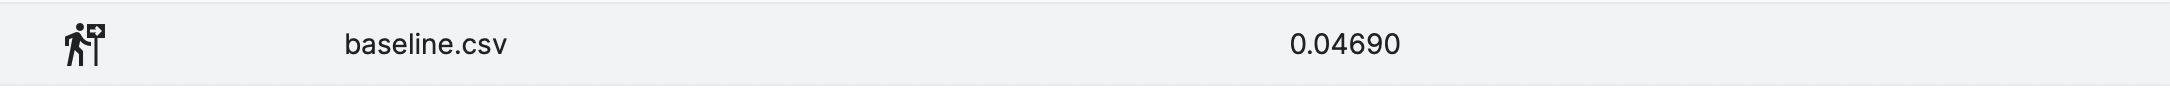

# Haar cascades

In [8]:
from tqdm import tqdm

dirname = "/gdrive/My Drive/ML_mini_course/StartML_AMI/train"

X, y = [], []
X_NF, y_NF = [], []


for fname in tqdm(os.listdir(dirname)):
    img = cv2.imread(os.path.join(dirname, fname), cv2.IMREAD_GRAYSCALE)
    label = int(fname.split('label')[1].split('.jpg')[0])
    try:
      img = cv2.resize(img, (256, 256), interpolation = cv2.INTER_AREA)
      face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt2.xml')
      face = face_cascade.detectMultiScale(img)
      for (a, b, w, h) in face:
        cv2.rectangle(img, (a, b), (a+w, b+h), (0, 0, 255), 2)
        face = img[b:b + h, a:a + w]
        
      h, w = face.shape
      size = min(h, w)
      h0 = int((h - size) / 2)
      w0 = int((w - size) / 2)
        
      img = face[h0: h0 + size, w0: w0 + size]
      img = cv2.resize(img, (64, 64), interpolation = cv2.INTER_AREA)
        
      X.append(img)
      y.append(label)
    except:
      h, w = img.shape
      size = min(h, w)
      h0 = int((h - size) / 2)
      w0 = int((w - size) / 2)
        
      img = img[h0: h0 + size, w0: w0 + size]
      img = cv2.resize(img, (64, 64), interpolation = cv2.INTER_AREA)
        
      X_NF.append(img)
      y_NF.append(label)

100%|██████████| 621/621 [00:43<00:00, 14.29it/s]


In [9]:
from sklearn.linear_model import LogisticRegression

Xtrain = np.asarray([el.ravel() for el in X])

model_lr_face = LogisticRegression()
model_lr_face.fit(Xtrain, y)


XtrainNF = np.asarray([el.ravel() for el in X_NF])

model_lr_NF = LogisticRegression()
model_lr_NF.fit(XtrainNF, y_NF)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression()

In [10]:
from tqdm import tqdm

def sort_by_index(fname):
    return int(fname.split('.')[0].split('img')[1])

dirname = "/gdrive/My Drive/ML_mini_course/StartML_AMI/test"

Xtest, Names = [], []
XtestNF, NamesNF = [], []

order = []

for fname in tqdm(sorted(os.listdir(dirname), key=sort_by_index)):
  img = cv2.imread(os.path.join(dirname, fname), cv2.IMREAD_GRAYSCALE)
  Names.append(fname)
  try:
    img = cv2.resize(img, (256, 256), interpolation = cv2.INTER_AREA)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt2.xml')
    face = face_cascade.detectMultiScale(img)
    for (a, b, w, h) in face:
      cv2.rectangle(img, (a, b), (a+w, b+h), (0, 0, 255), 2)
      face = img[b:b + h, a:a + w]
        
    h, w = face.shape
    size = min(h, w)
    h0 = int((h - size) / 2)
    w0 = int((w - size) / 2)
        
    img = face[h0: h0 + size, w0: w0 + size]
    img = cv2.resize(img, (64, 64), interpolation = cv2.INTER_AREA)
        
    Xtest.append(img)
    order.append(1)
  except:
    h, w = img.shape
    size = min(h, w)
    h0 = int((h - size) / 2)
    w0 = int((w - size) / 2)
        
    img = img[h0: h0 + size, w0: w0 + size]
    img = cv2.resize(img, (64, 64), interpolation = cv2.INTER_AREA)
        
    XtestNF.append(img)
    order.append(2)



Xtest = np.asarray([el.ravel() for el in Xtest])
pred_lr_face = model_lr_face.predict(Xtest)

XtestNF = np.asarray([el.ravel() for el in XtestNF])
pred_lr_NF = model_lr_NF.predict(XtestNF)

pred_lr = []
cnt1 = 0
cnt2 = 0
for num in order:
  if num == 1:
    pred_lr.append(pred_lr_face[cnt1])
    cnt1 += 1
  else:
    pred_lr.append(pred_lr_NF[cnt2])
    cnt2 += 1

100%|██████████| 4150/4150 [05:49<00:00, 11.86it/s]


In [11]:
import pandas as pd
from google.colab import files

pred_df = pd.DataFrame(list(zip(Names, pred_lr)), columns = ['img', 'label'])
print(pred_df.head())
pred_df.to_csv("2submission.csv", index=False)
files.download("2submission.csv")

'import pandas as pd\nfrom google.colab import files\n\npred_df = pd.DataFrame(list(zip(Names, pred_lr)), columns = [\'img\', \'label\'])\nprint(pred_df.head())\npred_df.to_csv("2submission.csv", index=False)\nfiles.download("2submission.csv")'

kaggle result
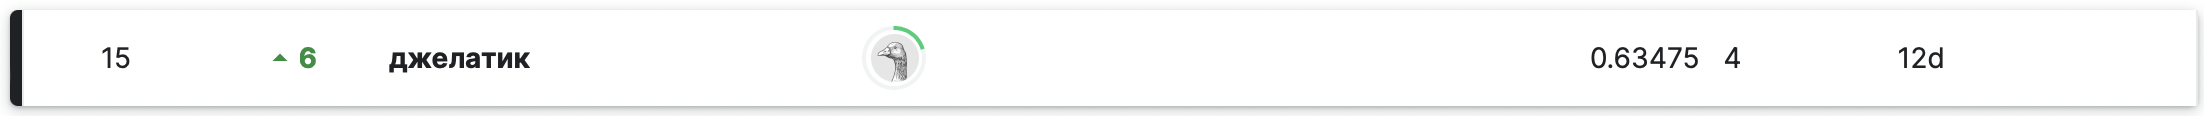

# Trying out augmentation

In [12]:
import random
import albumentations as A
%matplotlib inline

from albumentations import (
    HorizontalFlip, IAAPerspective, ShiftScaleRotate, CLAHE, RandomRotate90,
    Transpose, ShiftScaleRotate, Blur, OpticalDistortion, GridDistortion, HueSaturationValue,
    IAAAdditiveGaussianNoise, GaussNoise, MotionBlur, MedianBlur, IAAPiecewiseAffine,
    IAASharpen, IAAEmboss, RandomBrightnessContrast, Flip, OneOf, Compose
)

def get_aug(image):
    angle = np.arange(-10,11,1)
    angle0 = float(random.choice(angle))

    shift = 0.01*np.arange(-10,11,1)
    shift0 = float(random.choice(shift))

    transform = A.ShiftScaleRotate(shift_limit=shift0,rotate_limit=angle0,scale_limit=0,p=0.5)
    
    augmented_image = transform(image=image)['image']

    transform = A.HorizontalFlip(p=0.5)

    return transform(image=augmented_image)['image']

In [13]:
XtrainAug = []
ytrainAug = []

for a in X:
  for i in range(3):
    XtrainAug.append(get_aug(a))

for a in y:
  for i in range(3):
    ytrainAug.append(a)

In [14]:
"""XtrainAugNF = []
ytrainAugNF = []

for a in X_NF:
  for i in range(3):
    XtrainAugNF.append(get_aug(a))

for a in y_NF:
  for i in range(3):
    ytrainAugNF.append(a)""" # augmentation in the pictures where faces are not recognized is useless and even worsen the result in the competition

'XtrainAugNF = []\nytrainAugNF = []\n\nfor a in X_NF:\n  for i in range(3):\n    XtrainAugNF.append(get_aug(a))\n\nfor a in y_NF:\n  for i in range(3):\n    ytrainAugNF.append(a)'

In [15]:
XtrainAug = np.asarray([el.ravel() for el in XtrainAug])
#XtrainAugNF = np.asarray([el.ravel() for el in XtrainAugNF])

In [16]:
model_lr = LogisticRegression()
model_lr.fit(XtrainAug, ytrainAug)
model_lr_NF.fit(XtrainNF, y_NF)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression()

In [17]:
from tqdm import tqdm

def sort_by_index(fname):
    return int(fname.split('.')[0].split('img')[1])

dirname = "/gdrive/My Drive/ML_mini_course/StartML_AMI/test"

Xtest, Names = [], []
XtestNF, NamesNF = [], []

order = []

for fname in tqdm(sorted(os.listdir(dirname), key=sort_by_index)):
  img = cv2.imread(os.path.join(dirname, fname), cv2.IMREAD_GRAYSCALE)
  Names.append(fname)
  try:
    img = cv2.resize(img, (256, 256), interpolation = cv2.INTER_AREA)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt2.xml')
    face = face_cascade.detectMultiScale(img)
    for (a, b, w, h) in face:
      cv2.rectangle(img, (a, b), (a+w, b+h), (0, 0, 255), 2)
      face = img[b:b + h, a:a + w]
        
    h, w = face.shape
    size = min(h, w)
    h0 = int((h - size) / 2)
    w0 = int((w - size) / 2)
        
    img = face[h0: h0 + size, w0: w0 + size]
    img = cv2.resize(img, (64, 64), interpolation = cv2.INTER_AREA)
        
    Xtest.append(img)
    order.append(1)
  except:
    h, w = img.shape
    size = min(h, w)
    h0 = int((h - size) / 2)
    w0 = int((w - size) / 2)
        
    img = img[h0: h0 + size, w0: w0 + size]
    img = cv2.resize(img, (64, 64), interpolation = cv2.INTER_AREA)
        
    XtestNF.append(img)
    order.append(2)



Xtest = np.asarray([el.ravel() for el in Xtest])
pred_lr_face = model_lr_face.predict(Xtest)

XtestNF = np.asarray([el.ravel() for el in XtestNF])
pred_lr_NF = model_lr_NF.predict(XtestNF)

pred_lr = []
cnt1 = 0
cnt2 = 0
for num in order:
  if num == 1:
    pred_lr.append(pred_lr_face[cnt1])
    cnt1 += 1
  else:
    pred_lr.append(pred_lr_NF[cnt2])
    cnt2 += 1

100%|██████████| 4150/4150 [04:39<00:00, 14.87it/s]


In [33]:
import pandas as pd
from google.colab import files

pred_df = pd.DataFrame(list(zip(Names, pred_lr)), columns = ['img', 'label'])
print(pred_df.head())
pred_df.to_csv("AUGsubmission.csv", index=False)
files.download("AUGsubmission.csv")

        img  label
0  img0.jpg     18
1  img1.jpg     17
2  img2.jpg     14
3  img3.jpg     13
4  img4.jpg     16


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

kaggle result: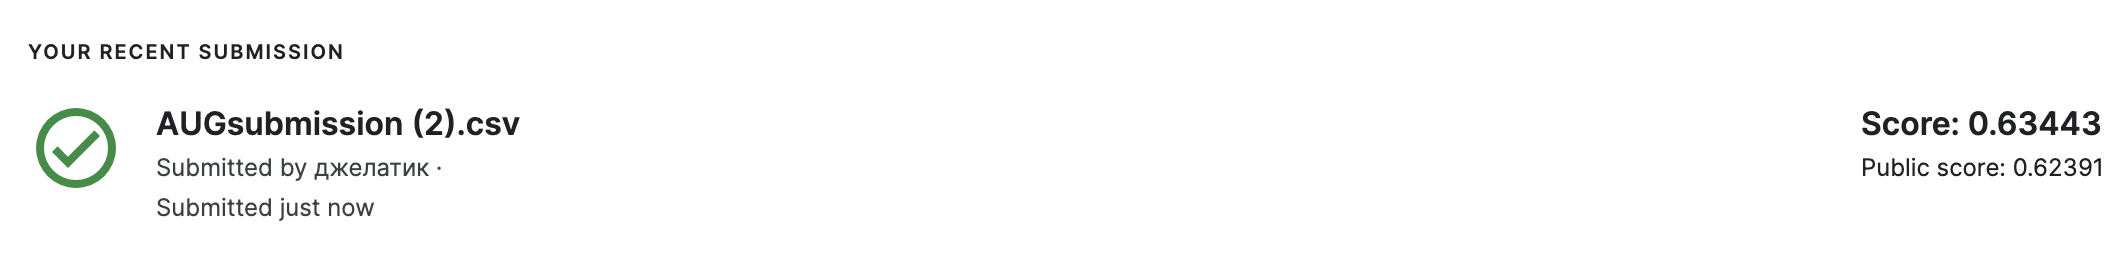

# PCA

In [18]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA, KernelPCA #Principal Components Analysis
from sklearn.pipeline import make_pipeline

pca = KernelPCA(n_components=200, kernel='poly', random_state=42)
model_lr_face = LogisticRegression()
model_lr_NF = LogisticRegression()

model_face = make_pipeline(pca, model_lr)
model_NF = make_pipeline(pca, model_lr_NF)

model_face.fit(XtrainAug, ytrainAug)
model_NF.fit(XtrainNF, y_NF)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Pipeline(steps=[('kernelpca',
                 KernelPCA(kernel='poly', n_components=200, random_state=42)),
                ('logisticregression', LogisticRegression())])

In [23]:
from tqdm import tqdm

def sort_by_index(fname):
    return int(fname.split('.')[0].split('img')[1])

dirname = "/gdrive/My Drive/ML_mini_course/StartML_AMI/test"

Xtest, Names = [], []
XtestNF, NamesNF = [], []

order = []

for fname in tqdm(sorted(os.listdir(dirname), key=sort_by_index)):
  img = cv2.imread(os.path.join(dirname, fname), cv2.IMREAD_GRAYSCALE)
  Names.append(fname)
  try:
    img = cv2.resize(img, (256, 256), interpolation = cv2.INTER_AREA)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt2.xml')
    face = face_cascade.detectMultiScale(img)
    for (a, b, w, h) in face:
      cv2.rectangle(img, (a, b), (a+w, b+h), (0, 0, 255), 2)
      face = img[b:b + h, a:a + w]
        
    h, w = face.shape
    size = min(h, w)
    h0 = int((h - size) / 2)
    w0 = int((w - size) / 2)
        
    img = face[h0: h0 + size, w0: w0 + size]
    img = cv2.resize(img, (64, 64), interpolation = cv2.INTER_AREA)
        
    Xtest.append(img)
    order.append(1)
  except:
    h, w = img.shape
    size = min(h, w)
    h0 = int((h - size) / 2)
    w0 = int((w - size) / 2)
        
    img = img[h0: h0 + size, w0: w0 + size]
    img = cv2.resize(img, (64, 64), interpolation = cv2.INTER_AREA)
        
    XtestNF.append(img)
    order.append(2)



Xtest = np.asarray([el.ravel() for el in Xtest])
pred_lr_face = model_face.predict(Xtest)

XtestNF = np.asarray([el.ravel() for el in XtestNF])
pred_lr_NF = model_NF.predict(XtestNF)

pred_lr = []
cnt1 = 0
cnt2 = 0
for num in order:
  if num == 1:
    pred_lr.append(pred_lr_face[cnt1])
    cnt1 += 1
  else:
    pred_lr.append(pred_lr_NF[cnt2])
    cnt2 += 1

100%|██████████| 4150/4150 [04:36<00:00, 15.04it/s]

(560, 4096)


'Xtest = np.asarray([el.ravel() for el in Xtest])\npred_lr_face = model_face.predict(Xtest)\n\nXtestNF = np.asarray([el.ravel() for el in XtestNF])\npred_lr_NF = model_NF.predict(XtestNF)\n\npred_lr = []\ncnt1 = 0\ncnt2 = 0\nfor num in order:\n  if num == 1:\n    pred_lr.append(pred_lr_face[cnt1])\n    cnt1 += 1\n  else:\n    pred_lr.append(pred_lr_NF[cnt2])\n    cnt2 += 1'

In [ ]:
import pandas as pd
from google.colab import files

pred_df = pd.DataFrame(list(zip(Names, pred_lr)), columns = ['img', 'label'])
print(pred_df.head())
pred_df.to_csv("PCAsubmission.csv", index=False)
files.download("PCAsubmission.csv")